In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("A1.3 Calificaciones.csv")
print("DESCRIBE ANTES DE LA TRANSFORMACIÓN")
display(df.describe())

DESCRIBE ANTES DE LA TRANSFORMACIÓN


,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:

df["Escuela"] = df["Escuela"].map({"GP": 0, "MS": 1})
df["Sexo"] = df["Sexo"].map({"F": 0, "M": 1})
df["Internet"] = df["Internet"].map({"no": 0, "yes": 1})
print("DESCRIBE DESPUÉS DE LA TRANSFORMACIÓN")
display(df.describe())


DESCRIBE DESPUÉS DE LA TRANSFORMACIÓN


,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,2.035443,0.334177,0.832911,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.839240,0.743651,0.373528,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,2.000000,0.000000,1.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,2.000000,0.000000,1.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,4.000000,3.000000,1.000000,75.000000,19.000000,19.000000,20.000000


,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
Escuela,1.000000,-0.012286,0.377610,-0.090681,0.059804,-0.133578,-0.088480,-0.025731,-0.050086,-0.045017
Sexo,-0.012286,1.000000,-0.028606,-0.306268,0.044436,0.044113,-0.066962,0.091839,0.091099,0.103456
Edad,0.377610,-0.028606,1.000000,-0.004140,0.243665,-0.112094,0.175230,-0.064081,-0.143474,-0.161579
HorasDeEstudio,-0.090681,-0.306268,-0.004140,1.000000,-0.173563,0.059422,-0.062700,0.160612,0.135880,0.097820
Reprobadas,0.059804,0.044436,0.243665,-0.173563,1.000000,-0.063451,0.063726,-0.354718,-0.355896,-0.360415
Internet,-0.133578,0.044113,-0.112094,0.059422,-0.063451,1.000000,0.101701,0.071619,0.119439,0.098483
Faltas,-0.088480,-0.066962,0.175230,-0.062700,0.063726,0.101701,1.000000,-0.031003,-0.031777,0.034247
G1,-0.025731,0.091839,-0.064081,0.160612,-0.354718,0.071619,-0.031003,1.000000,0.852118,0.801468
G2,-0.050086,0.091099,-0.143474,0.135880,-0.355896,0.119439,-0.031777,0.852118,1.000000,0.904868
G3,-0.045017,0.103456,-0.161579,0.097820,-0.360415,0.098483,0.034247,0.801468,0.904868,1.000000


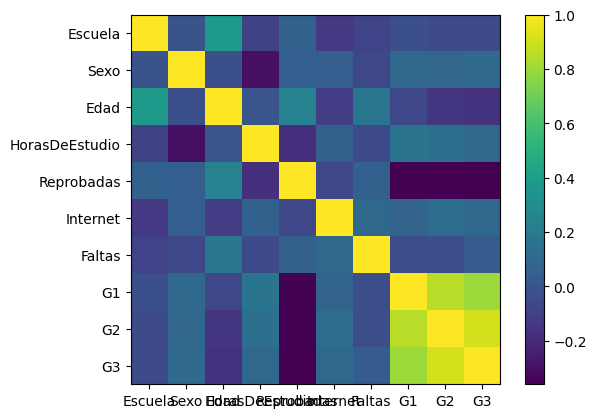

In [ ]:
corr = df.corr()
display(corr)
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
y = df["G3"]
X = df[["G2", "Reprobadas", "Edad", "HorasDeEstudio"]]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     378.0
Date:                Thu, 05 Feb 2026   Prob (F-statistic):          4.92e-118
Time:                        15:22:50   Log-Likelihood:                -636.32
No. Observations:                 316   AIC:                             1283.
Df Residuals:                     311   BIC:                             1301.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5137      0.103    102.245      0.0

In [ ]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print("R2 train:", r2_train)
print("R2 test:", r2_test)
print("Diferencia:", r2_train - r2_test)

R2 train: 0.8293864999926684
R2 test: 0.7961256030255024
Diferencia: 0.033260896967166054


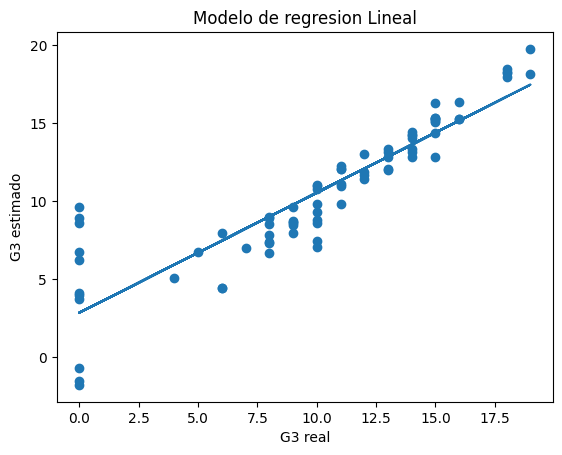

In [ ]:
y_est = model.predict(X_test)
plt.figure()
plt.scatter(y_test, y_est)
m, b = np.polyfit(y_test, y_est, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("G3 real")
plt.ylabel("G3 estimado")
plt.title("Modelo de regresion Lineal")
plt.show()